<a href="https://colab.research.google.com/github/Prianjali14/CodSoft/blob/main/PROJECTSystemModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [181]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import pickle

In [182]:
# Load Myntra dataset
myntra = pd.read_csv('myntra_excel.csv')

In [183]:
myntra.shape

(8589, 26)

In [184]:
# Remove duplicate entries based on title from myntra
myntra  = myntra.drop_duplicates(subset=['title'])
myntra.shape

(7010, 26)

In [185]:
myntra

,uniq_id,crawl_timestamp,product_id,link,size,variant_sku,brand,care_instructions,dominant_material,title,...,size_fit,complete_the_look,type,variant_price,variant_compare_at_price,ideal_for,is_in_stock,inventory,specifications,Unnamed: 25
0,cc51c3dd925d9d84e2fb28c7918dbbc3,2019-08-11 05:49:46 +0000,6937673.0,https://www.myntra.com/tops/imara/imara-women-...,XL,6937673_XL,IMARA,Polyester | Dry-clean,Polyester,IMARA Women Black Solid Top,...,"The model (height 5'8"") is wearing a size S",Improve your personal style with a brand new t...,Clothing/Women/Tops/IMARA/More by IMARA,959.0,1599.0,Women,Out of Stock,0,Transparency : Opaque | Sleeve Styling : Bell ...,NaN
1,c7e2fe388a93dae5c86b50dd8a5dbd7a,2019-07-03 01:04:34 +0000,7441182.0,https://www.myntra.com/kurtas/house-of-pataudi...,XL,7441182_XL,House of Pataudi,100% cottonMachine-wash,cotton,House of Pataudi Men Black Printed Straight Kurta,...,The model (height 6') is wearing a size M,"From House of Pataudi, this kurta is a great w...",Clothing/Men/Kurtas/House of Pataudi/More by H...,799.0,1999.0,Men,In Stock,Shape : Straight | Sleeve Styling : Regular Sl...,NaN,NaN
2,76949d78057a633aace6246045eefd66,2019-07-15 09:43:31 +0000,9245141.0,https://www.myntra.com/pillows/the-white-willo...,S,9245141_S,The White Willow,Polycotton | Only spot clean by hand with warm...,Cotton,The White Willow Unisex Off-White Therapedic M...,...,Dimensions: 58.42 cm x 33.02 cm x 10.16 cm,The White Willow has been founded with the vis...,Home/Unisex/Pillows/The White Willow/More by T...,1399.0,2799.0,Unisex,In Stock,Number of Components : 1 | Material : Polycott...,NaN,NaN
3,5f83f6b51da1ef93bc0585577b6991e6,2019-07-15 14:11:14 +0000,1314889.0,https://www.myntra.com/dupatta/dupatta-bazaar/...,Onesize,1314889_Onesize,Dupatta Bazaar,Chiffon | Hand-wash,Chiffon,Dupatta Bazaar Pink Dupatta,...,Length: 2.3 metres Width: 1.1 metres,Complement your ethnic ensemble with this dupa...,Clothing/Women/Dupatta/Dupatta Bazaar/More by ...,349.0,499.0,Women,In Stock,Pattern : Solid | Occasion : Daily | Border : ...,NaN,NaN
4,890bf4355c319a4211296b9d3176d11f,2019-06-01 08:17:28 +0000,7705322.0,https://www.myntra.com/kurta-sets/manyavar/man...,S,7705322_S,Manyavar,Top fabric: Silk Blend | Bottom fabric: Silk B...,Silk,Manyavar Men Yellow & White Self Design Kurta ...,...,The model (height 6') is wearing a size M,"From Manyavar, this kurta is a great way to sh...",Clothing/Men/Kurta Sets/Manyavar/More by Manyavar,2999.0,2999.0,Men,Out of Stock,Occasion : Festive | Number of Components : 2 ...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8583,45301b44da33c727f87a759487f15938,2019-08-11 00:45:35 +0000,7320069.0,https://www.myntra.com/shirts/libas/libas-wome...,XXL,7320069_XXL,Libas,Viscose Rayon | Hand-wash,Viscose Rayon,Libas Women Green Regular Fit Solid Casual Shirt,...,"The model (height 5'8"") is wearing a size S",This shirt from Libas has three-quarter sleeve...,Clothing/Women/Shirts/Libas/More by Libas,699.0,1399.0,Women,Out of Stock,0,Placket Length : Full | Transparency : Opaque ...,NaN
8584,3871ecf7306dc553ad45dbead9beb844,2019-08-14 12:15:44 +0000,8891707.0,https://www.myntra.com/8891707,M,8891707_M,ANAISA,Viscose Rayon | Hand-wash,Viscose Rayon,ANAISA Women Red & Blue Floral Print Maxi Dress,...,"Semi-Fit The model (height 5'8"") is wearing a ...",Replace some of your outdated essentials with ...,Clothing/Women/Dresses/ANAISA/More by ANAISA,1149.0,2299.0,Women,Out of Stock,0,Knit or Woven : Woven | Transparency : Opaque ...,NaN
8585,8d26070fff03dcb264f2b5d2f81b6843,2019-07-03 05:31:13 +0000,1778838.0,https://www.myntra.com/kurta-sets/biba/biba-gi...,5Y,1778838_5Y,Biba,100% cottonHand-wash cold,cotton,Biba Girls Off-White & Blue Floral Print Salwa...,...,NaN,Finely crafted with attention to pure detailin...,Clothing/Girls/Kurta Sets/Biba/More by Biba,1299.0,1299.0,Girls,Out of Stock,Dupatta Fabric : Pure Cotton | Sleeve Styling ...,NaN,NaN
8587,ce47ae379572313c

In [186]:
# After removing duplicate values, Reset index of database
myntra.reset_index(drop=True, inplace = True)

In [187]:
# All the features of the dataset
features = myntra.columns
print(features)

Index(['uniq_id', 'crawl_timestamp', 'product_id', 'link', 'size',
       'variant_sku', 'brand', 'care_instructions', 'dominant_material',
       'title', 'actual_color', 'dominant_color', 'product_type', 'images',
       'body', 'product_details', 'size_fit', 'complete_the_look', 'type',
       'variant_price', 'variant_compare_at_price', 'ideal_for', 'is_in_stock',
       'inventory', 'specifications', 'Unnamed: 25'],
      dtype='object')


In [188]:
# To check if the dataset has any null values or not
myntra.isnull().sum()

uniq_id                        0
crawl_timestamp                1
product_id                     1
link                           1
size                           1
variant_sku                    1
brand                          1
care_instructions             10
dominant_material            288
title                          1
actual_color                 472
dominant_color               477
product_type                 743
images                         1
body                           1
product_details                1
size_fit                     676
complete_the_look            126
type                           1
variant_price                  1
variant_compare_at_price       1
ideal_for                      1
is_in_stock                    1
inventory                     63
specifications              3161
Unnamed: 25                 6858
dtype: int64

In [189]:
# First row
myntra.loc[0]

uniq_id                                      cc51c3dd925d9d84e2fb28c7918dbbc3
crawl_timestamp                                     2019-08-11 05:49:46 +0000
product_id                                                          6937673.0
link                        https://www.myntra.com/tops/imara/imara-women-...
size                                                                       XL
variant_sku                                                        6937673_XL
brand                                                                   IMARA
care_instructions                                       Polyester | Dry-clean
dominant_material                                                   Polyester
title                                             IMARA Women Black Solid Top
actual_color                                                            Black
dominant_color                                                          Black
product_type                                                    

In [190]:
myntra['product_id'].value_counts()

product_id
6937673.0    1
9899891.0    1
7241729.0    1
6984971.0    1
2367780.0    1
            ..
9452211.0    1
6819016.0    1
6844812.0    1
1566627.0    1
1541516.0    1
Name: count, Length: 7009, dtype: int64

In [191]:
# Drop duplicate products based on product_id
myntra = myntra.drop_duplicates(subset = ["product_id"])
myntra.shape

(7010, 26)

In [192]:
# No duplicate entries available based on product_id
myntra['product_id'].value_counts()

product_id
6937673.0    1
9899891.0    1
7241729.0    1
6984971.0    1
2367780.0    1
            ..
9452211.0    1
6819016.0    1
6844812.0    1
1566627.0    1
1541516.0    1
Name: count, Length: 7009, dtype: int64

In [193]:

myntra['ideal_for'].value_counts()

ideal_for
Women     4154
Men       1872
Girls      345
Unisex     334
Boys       304
Name: count, dtype: int64

<Axes: xlabel='ideal_for', ylabel='count'>

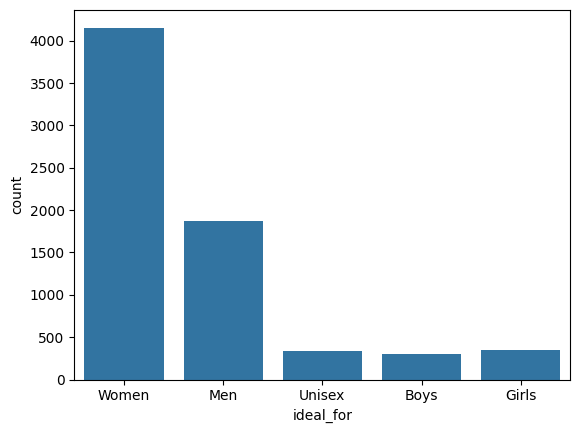

In [194]:
sns.countplot(x = 'ideal_for', data = myntra)

In [195]:
myntra['brand'].value_counts()

brand
Anouk                    739
Biba                     504
Libas                    398
Global Desi              353
Shree                    328
                        ... 
LOCOMOTIVE                 1
PANIT                      1
Boutique Living India      1
JADE BLUE                  1
AND                        1
Name: count, Length: 333, dtype: int64

<Axes: xlabel='brand'>

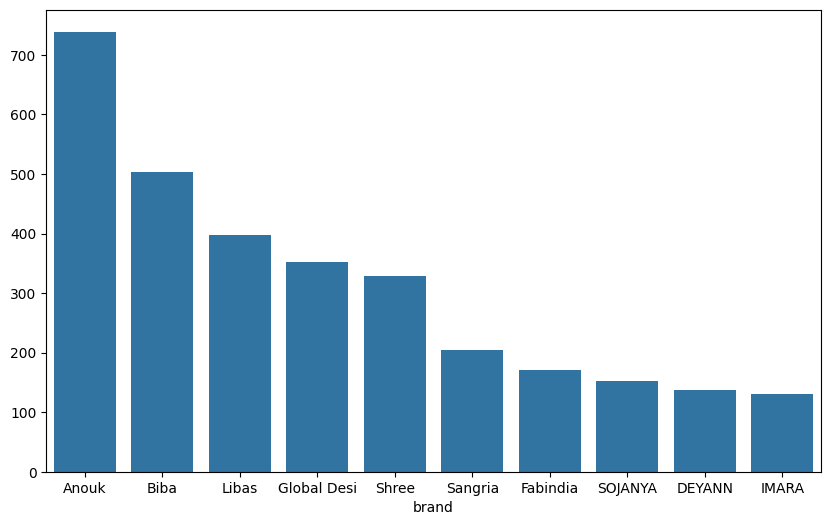

In [196]:
# Top 10 brands bard plot
plt.figure(figsize=(10,6))
sns.barplot(x = myntra['brand'].value_counts().index[0:10] , y = myntra['brand'].value_counts().values[0:10] )

In [197]:
Top_Brands = dict(myntra['brand'].value_counts()[0: 20])
print(Top_Brands)

{'Anouk': 739, 'Biba': 504, 'Libas': 398, 'Global Desi': 353, 'Shree': 328, 'Sangria': 205, 'Fabindia': 171, 'SOJANYA': 152, 'DEYANN': 137, 'IMARA': 131, 'VASTRAMAY': 121, 'GERUA': 119, 'KISAH': 110, 'Inddus': 99, 'Aj DEZInES': 99, 'even': 96, 'Freehand': 88, 'INDYA': 86, 'YK': 84, 'Soch': 82}


In [198]:
myntra['inventory'][0]

'0'

In [199]:
myntra['inventory'][1]

'Shape : Straight | Sleeve Styling : Regular Sleeves | Occasion : Daily | Print or Pattern Type : Geometric | Number of Components : 1 | Design Styling : Regular | Colour Family : Monochrome | Neck : Mandarin Collar | Pattern : Printed | Body or Garment Size : Garment Measurements in | Sleeve Length : Long Sleeves | Weave Pattern : Regular | Fabric Purity : Pure | Stitch : Ready to Wear | Hemline : Straight | Wash Care : Machine Wash | Weave Type : Machine Weave | Length : Knee Length | Slit Detail : Side Slits | Fabric : Cotton'

In [200]:
# Firstly Fill every null values with ""
myntra['inventory'].fillna("", inplace = True)

# If string has length less than 2 = replace it with " " in inventory
def updateInventory(x):
    if(len(x) < 2):
        x = " "
    return x
myntra['inventory'] = myntra['inventory'].apply(updateInventory)


myntra['inventory']


0                                                        
1       Shape : Straight | Sleeve Styling : Regular Sl...
2       Number of Components : 1 | Material : Polycott...
3       Pattern : Solid | Occasion : Daily | Border : ...
4       Occasion : Festive | Number of Components : 2 ...
                              ...                        
7005                                                     
7006                                                     
7007    Dupatta Fabric : Pure Cotton | Sleeve Styling ...
7008                                                     
7009                                                     
Name: inventory, Length: 7010, dtype: object

In [201]:

# Split the string and then replace all numvers and regular expressions with " " and return preprocessed string which can bes used in model training
def preprocessInventory(x):

    ls = x.split(" | ")

    str = " ".join(ls)
    cleanString = re.sub('\W+',' ', str ).strip()

    return cleanString.lower()


myntra['Pre_Inventory'] = myntra['inventory'].apply(preprocessInventory)

myntra['Pre_Inventory']

0                                                        
1       shape straight sleeve styling regular sleeves ...
2       number of components 1 material polycotton set...
3               pattern solid occasion daily border solid
4       occasion festive number of components 2 top pa...
                              ...                        
7005                                                     
7006                                                     
7007    dupatta fabric pure cotton sleeve styling regu...
7008                                                     
7009                                                     
Name: Pre_Inventory, Length: 7010, dtype: object

In [202]:
myntra['type'][0]

'Clothing/Women/Tops/IMARA/More by IMARA'

In [203]:
# for getting all values separated by "/" and use it into model
def preprocessType(x):
    ls = x.split("/")
    str = ' '.join(ls).strip()
    return str.lower()


myntra['type'] = myntra['type'].apply(preprocessType)

AttributeError: 'float' object has no attribute 'split'

In [ ]:
myntra['type'][0: 5]

In [ ]:
myntra['body'][1]

In [ ]:
# Remove numbers and regular expressions from the string and preprocess it

def preproceBody(X):


    cleanString = re.sub(r"[^A-Za-z]+",' ', X )

    return cleanString.lower()

myntra['preprocess_body'] = myntra['body'].apply(preproceBody)
myntra['preprocess_body'][0]

In [ ]:
# Fill evenry null values with ""
myntra['care_instructions'].fillna("", inplace=True )
myntra['care_instructions'].isnull().sum()


In [ ]:
myntra['dominant_material'].fillna('', inplace = True)
myntra['dominant_color'].fillna("", inplace=True)
myntra['actual_color'].fillna("", inplace=True)
print(myntra['dominant_material'].isnull().sum())
print(myntra['dominant_color'].isnull().sum())
print(myntra['actual_color'].isnull().sum())

In [ ]:
# Multiple images are there so covert them into list
def image_process(x):
    x = x.split(" | ")

    return x

In [ ]:

myntra['images'] = myntra['images'].apply(image_process)
myntra['images']

In [ ]:
# remove all data with less than 4 images
myntra = myntra[myntra['images'].apply(lambda x : len(x) > 3)]

In [ ]:
myntra['specifications'].fillna("" , inplace = True)

In [ ]:
# Preprocessing
def preprocessCareInstruction(x):
    x = x.replace(u'\xa0', u' ')
    x = x.replace('-', '')


    ls = x.split(" | ")

    str = " ".join(ls)
    cleanString = re.sub('\W+',' ', str ).strip()

    return cleanString.lower()


myntra['care_instructions'] = myntra['care_instructions'].apply(preprocessCareInstruction)

myntra['care_instructions'][12]

In [ ]:
myntra.head()

In [ ]:
# reset index
myntra.reset_index(drop = True, inplace = True)

In [ ]:
# Creating corpus of data for model training

myntra['corpusData'] = myntra['size']+ " "  + myntra['care_instructions']+ " " + myntra['dominant_material']+ " " + myntra['actual_color'] + " " + myntra['dominant_color'] + " " + myntra['product_type']+ " " + myntra['preprocess_body'] + " " + myntra['type'] + " " + myntra['ideal_for'] + " " + myntra['Pre_Inventory']

In [ ]:
# Drop Unnecessery column
myntra.drop('Unnamed: 25', axis =1, inplace = True)

In [ ]:
# Remove all null values
myntra.dropna(inplace = True)

In [ ]:
myntra.shape

In [ ]:
myntra.reset_index(inplace = True)

In [ ]:

# Product_id == index
myntra['product_id'] = myntra['index']


In [ ]:
myntra = myntra.drop_duplicates(subset=['title'])
myntra.shape

In [ ]:
myntra['img1'] = myntra['images'].iloc[1][0]
myntra['img3'] = myntra['images'].iloc[1][0]
myntra['img2'] = myntra['images'].iloc[1][0]
myntra['img4'] = myntra['images'].iloc[1][0]

In [ ]:
# Create 4 columns and add product images into it

for i in range(myntra.shape[0]):
    myntra['img1'].iloc[i] = myntra['images'].iloc[i][0]
    myntra['img2'].iloc[i] = myntra['images'].iloc[i][1]
    myntra['img3'].iloc[i] = myntra['images'].iloc[i][2]
    myntra['img4'].iloc[i] = myntra['images'].iloc[i][3]

In [ ]:
myntra.shape

In [ ]:
myntra.columns

In [ ]:
# Load ratings dataset
ratings = pd.read_csv('ratings.csv')

In [ ]:
ratings.shape

In [ ]:
ratings.head()

In [ ]:
# Drop unnecessery column
ratings.drop('Unnamed: 0' , axis =1 , inplace = True)

In [ ]:
ratings.head(1)

In [ ]:
# merge ratings dataset with myntra using product_id
myntra_merge_ratings = ratings.merge(myntra , on="product_id")
myntra_merge_ratings.head(2)

In [ ]:
myntra_merge_ratings.shape

In [ ]:

# Total Number of counts on each products
ratingCount = (myntra_merge_ratings.groupby(by=['title'])['Rating'].count().reset_index().rename(columns = {'Rating': "TotalCountRating"})[["title", "TotalCountRating"]])

In [ ]:
ratingCount

In [ ]:
ratingCount.describe()

In [ ]:

# Average product rating on each product
averageRating = (myntra_merge_ratings.groupby(by=['title'])['Rating'].mean().reset_index().rename(columns = {'Rating': "AverageRatingCount"})[["title", "AverageRatingCount"]])

In [ ]:
averageRating

In [ ]:
# Find all the product index with ratings
tit = ratingCount['title']
# print(tit)
# ind = []
idx = []
for title in tit:

    new_df = myntra[myntra['title'] == title]
    idx.append(new_df.index)


prod_idx = []
for i in idx:
    prod_idx.append(i[0])
len(prod_idx)

In [ ]:
# remove all products withour rarings
myntra = myntra.iloc[prod_idx]
myntra.reset_index(drop = True , inplace = True)
myntra

In [ ]:

# Remove columns
drop_columns = ['index' , 'crawl_timestamp' , 'uniq_id' , 'variant_sku', 'link'  , 'care_instructions' , 'is_in_stock', 'images', 'size_fit', 'specifications' ]
new_df = myntra.drop(drop_columns, axis = 1)
new_df.head()

In [ ]:


drop_from_myntra = ['index' , 'crawl_timestamp', 'uniq_id', 'is_in_stock' , 'link', 'variant_sku', 'care_instructions','images', 'size_fit', 'type', 'is_in_stock' , 'Pre_Inventory', 'preprocess_body', 'corpusData' ]
myntra.drop(drop_from_myntra, axis =1 , inplace = True)

In [ ]:
myntra.shape

In [ ]:
# Store updated data into myntra.csv file
myntra.to_csv('myntra.csv')

## Popularity based recommendation system

In [ ]:
# merge totalRating and average Rating
rating_df = ratingCount.merge(averageRating , on="title" )
rating_df

In [ ]:
rating_df.describe()

In [ ]:

# Get popular products by query
polular_df = rating_df[rating_df['TotalCountRating'] > 150].sort_values('AverageRatingCount', ascending=False).head(100)
polular_df

In [ ]:
# Merge popular products with myntra to get whole data
popular_products = polular_df.merge(myntra , on="title")
popular_products

In [ ]:

# Function for getting popular products based on gender
def getPopularProd( data, gender, myntra):
    data = data[data['ideal_for'] == gender]
    ratingCount = (data.groupby(by=['title'])['Rating'].count().reset_index().rename(columns = {'Rating': "TotalCountRating"})[["title", "TotalCountRating"]])
    averageRating = (data.groupby(by=['title'])['Rating'].mean().reset_index().rename(columns = {'Rating': "AverageRatingCount"})[["title", "AverageRatingCount"]])
    rating_df = ratingCount.merge(averageRating , on="title" )
    polular_df = rating_df[rating_df['TotalCountRating'] > 100].sort_values('AverageRatingCount', ascending=False).head(100)
    popular_products = polular_df.merge(myntra , on="title")
    return popular_products

In [ ]:
# popular products for women
women_popular = getPopularProd(myntra_merge_ratings , "Women" , myntra)
women_popular

In [ ]:
# popular products for men
men_popular = getPopularProd(myntra_merge_ratings , "Men" , myntra)
men_popular

In [ ]:
# Dump the files
pickle.dump(women_popular, open('women_popular.pkl', 'wb' ) )
pickle.dump(men_popular, open('men_popular.pkl', 'wb' ) )
pickle.dump(popular_products, open('popular_products.pkl', 'wb' ) )

## Collaborative Filtering

In [ ]:
# merge ratings with myntra_merge_ratings
main_data = rating_df.merge(myntra_merge_ratings, on="title")
main_data.head(2)

In [ ]:
# Create pivot matrix
pivot_Matrix = main_data.pivot_table(index='title' , columns ='userId' , values='Rating').fillna(0)
pivot_Matrix

In [ ]:
# Fit povot_matrix data into Nearest neighbour
from scipy.sparse import csr_matrix

main_matrix = csr_matrix(pivot_Matrix.values)

from sklearn.neighbors import NearestNeighbors


model_knn = NearestNeighbors(metric = "cosine", algorithm="brute")
model_knn.fit(main_matrix)

In [ ]:
# Find distances and indices for every products
distances , indices = model_knn.kneighbors(pivot_Matrix.iloc[0: ].values ,n_neighbors = 7)

In [ ]:
indices

In [ ]:
# Dump pickel files
pickle.dump(pivot_Matrix.index, open('pivot_matrix.pkl', 'wb' ) )
pickle.dump(indices, open('filtered_indices.pkl', 'wb' ) )

In [ ]:
myntra['title'].iloc[4]

In [ ]:
dat = np.array(pivot_Matrix.loc[myntra['title'].iloc[4]])
dat = dat.reshape(1 ,-1)

In [ ]:
distances , indices = model_knn.kneighbors(dat ,n_neighbors = 7)

## Content Based

In [ ]:

# import ntlk
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords


In [ ]:


from sklearn.feature_extraction.text import TfidfVectorizer
lemmatizer = WordNetLemmatizer()

# Define TfidfVectorizer
tfv = TfidfVectorizer(min_df = 20, stop_words = 'english', analyzer ="word" , strip_accents = "unicode", ngram_range= (1 , 3) )

# Function to lemmatizatio of text
def lemmatizeText(x):
    words = nltk.word_tokenize(x)
    words = [lemmatizer.lemmatize(word) for word in words if word not in set(stopwords.words('english'))]
    x = ' '.join(words)
    return x




In [ ]:
# Apply lemmatization on corpus data
new_df['corpusData'] = new_df['corpusData'].apply(lemmatizeText)
new_df['corpusData']

In [ ]:
# Fit lemmatized corpus data into tfv
tfv_matrix = tfv.fit_transform(new_df['corpusData'])

In [ ]:
tfv_matrix

In [ ]:
tfv_matrix.shape

In [ ]:
# For getting cosine similarity
from sklearn.metrics.pairwise import sigmoid_kernel

sig = sigmoid_kernel(tfv_matrix , tfv_matrix)


In [ ]:
sig

In [ ]:

indices = pd.Series(new_df.index , index = new_df['title']).drop_duplicates()
indices

In [ ]:
import pickle
pickle.dump(sig, open('sig.pkl', 'wb' ) )

In [ ]:

pickle.dump(indices, open('indices.pkl', 'wb' ) )

In [ ]:

# Recommandation of similar products based on title
def recommendProduct(title , sig=sig):

    index = indices[title]

    sig_cs = list(enumerate(sig[index]))

    sig = sorted(sig_cs , key = lambda x : x[1] , reverse= True)


    sig_cs = sig[1: 11]

    product_indices = [i[0] for i in sig_cs]

    return myntra.iloc[product_indices]


In [ ]:
new_df['title'][50]

In [ ]:
recommendProduct("Libas Women Green Yoke Design Straight Kurta")

In [ ]:
# df_men = myntra[myntra['ideal_for'] == "Men"]
# df_men.to_csv("./Dataset/men.csv")
# df_men.shape

In [ ]:
# df_men = myntra[myntra['ideal_for'] == "Women"]
# df_men.to_csv("./Dataset/woman.csv")
# df_men.shape